In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("Bengaluru_House_Data.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df.isna().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [4]:
df2 = df.drop(["area_type","availability","society"],axis=1)
df2.head()

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00


### Data cleaning

In [5]:
df2.isna().sum()

location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [6]:
df2['balcony'].fillna(df2.balcony.median(),inplace=True)

In [7]:
df2.isna().sum()

location       1
size          16
total_sqft     0
bath          73
balcony        0
price          0
dtype: int64

In [8]:
df2.dropna(inplace=True)

In [9]:
df2.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

In [10]:
df2['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [11]:
df2['bhk'] = df2['size'].apply(lambda x: int(x.split(' ')[0]))
df2.head()

,location,size,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,1.0,51.00,2


In [12]:
df2.drop(['size'],axis=1,inplace=True)
df2.head()

,location,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,2600,5.0,3.0,120.00,4
2,Uttarahalli,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,1521,3.0,1.0,95.00,3
4,Kothanur,1200,2.0,1.0,51.00,2


In [13]:
len(df2.location.unique())

1304

In [14]:
df2.shape

(13246, 6)

In [15]:
df2.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [16]:
def isFloat(x):
    try:
        float(x)
    except:
        return False
    return True

In [17]:
df2[~df2.total_sqft.apply(lambda x : isFloat(x))].head(10)

,location,total_sqft,bath,balcony,price,bhk
30,Yelahanka,2100 - 2850,4.0,0.0,186.000,4
122,Hebbal,3067 - 8156,4.0,0.0,477.000,4
137,8th Phase JP Nagar,1042 - 1105,2.0,0.0,54.005,2
165,Sarjapur,1145 - 1340,2.0,0.0,43.490,2
188,KR Puram,1015 - 1540,2.0,0.0,56.800,2
410,Kengeri,34.46Sq. Meter,1.0,0.0,18.500,1
549,Hennur Road,1195 - 1440,2.0,0.0,63.770,2
648,Arekere,4125Perch,9.0,2.0,265.000,9
661,Yelahanka,1120 - 1145,2.0,0.0,48.130,2
672,Bettahalsoor,3090 - 5002,4.0,0.0,445.000,4


In [18]:
def convert_to_float(x):
    tokens = x.split('-')
    if len(tokens)==2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        num = float(x)
        return num
    except:
        return None

In [19]:
df3 = df2.copy()
df3['total_sqft'] = df2.total_sqft.apply(lambda x : convert_to_float(x))
df3.total_sqft.unique()

array([1056. , 2600. , 1440. , ..., 1258.5,  774. , 4689. ])

In [20]:
df3.loc[30]

location      Yelahanka
total_sqft       2475.0
bath                4.0
balcony             0.0
price             186.0
bhk                   4
Name: 30, dtype: object

### Feature Engineering

In [21]:
# Now let's calculate price per sq ft column
df4 = df3.copy()
df4['price per sqft'] = df3['price']*100000/df3['total_sqft']
df4.head()

,location,total_sqft,bath,balcony,price,bhk,price per sqft
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,1.0,51.00,2,4250.000000


In [22]:
len(df4['location'].unique())

1304

In [23]:
# if we do one hot code on those, there would be 1300 columns.
location_stats = df4.groupby('location')['location'].agg('count').sort_values(ascending = False)
location_stats

location
Whitefield             534
Sarjapur  Road         392
Electronic City        302
Kanakpura Road         266
Thanisandra            233
                      ... 
 Banaswadi               1
Kanakadasa Layout        1
Kanakapur main road      1
Kanakapura  Rod          1
whitefiled               1
Name: location, Length: 1304, dtype: int64

In [24]:
locations_less_than_10 = location_stats[location_stats<=10]
locations_less_than_10

location
Dodsworth Layout         10
1st Block Koramangala    10
Nagappa Reddy Layout     10
Ganga Nagar              10
Dairy Circle             10
                         ..
 Banaswadi                1
Kanakadasa Layout         1
Kanakapur main road       1
Kanakapura  Rod           1
whitefiled                1
Name: location, Length: 1063, dtype: int64

In [25]:
df5 = df4.copy()
df5['location'] = df4.location.apply(lambda x : 'other' if x in locations_less_than_10 else x)
df5.head(20)

,location,total_sqft,bath,balcony,price,bhk,price per sqft
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,1.0,51.00,2,4250.000000
5,Whitefield,1170.0,2.0,1.0,38.00,2,3247.863248
6,Old Airport Road,2732.0,4.0,2.0,204.00,4,7467.057101
7,Rajaji Nagar,3300.0,4.0,2.0,600.00,4,18181.818182
8,Marathahalli,1310.0,3.0,1.0,63.25,3,4828.244275
9,other,1020.0,6.0,2.0,370.00,6,36274.509804


In [26]:
len(df5['location'].unique())

242

### Outlier Removal

In [27]:
print(df5.shape)
df6 = df5[~(df5['total_sqft']/df5['bhk']<300)]
print(df6.shape)
df6.head() 

(13246, 7)
(12502, 7)


,location,total_sqft,bath,balcony,price,bhk,price per sqft
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,1.0,51.00,2,4250.000000


In [28]:
list = df6['price per sqft'].describe()
# list[0] = mean
# list[1] = std
mn = list[1]
sd = list[2]
list

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price per sqft, dtype: float64

In [29]:
print(df6.shape)
df6.groupby('location')['location']

(12502, 7)


In [30]:
# Here the price varies with location, so First group by location and then consider (mean + 1*std) values
def remove_pp_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        mn = np.mean(subdf['price per sqft'])
        sd = np.std(subdf['price per sqft'])
        tmp = subdf[(subdf['price per sqft'] > (mn-sd)) & (subdf['price per sqft'] <= (mn+sd))]
        df_out = pd.concat([df_out,tmp],ignore_index=True)
    return df_out
        

In [31]:
df7 = remove_pp_outliers(df6)
print(df7.shape)
df7.head()

(10244, 7)


,location,total_sqft,bath,balcony,price,bhk,price per sqft
0,Devarachikkanahalli,1250.0,2.0,3.0,44.0,3,3520.000000
1,Devarachikkanahalli,1250.0,2.0,2.0,40.0,2,3200.000000
2,Devarachikkanahalli,1200.0,2.0,2.0,83.0,2,6916.666667
3,Devarachikkanahalli,1170.0,2.0,2.0,40.0,2,3418.803419
4,Devarachikkanahalli,1425.0,2.0,2.0,65.0,3,4561.403509


In [32]:
# df7[df7['location']=='Devarachikkanahalli'].shape --> initially gave 'zero 0' rows because of spaces at start and end.
dum = df7.copy()
dum['location'] = df7['location'].apply(lambda x : x.strip())
df7 = dum

In [33]:
def plot_scatter_char(df,loc):
    bhk_1 = df[(df['bhk']==1) & (df['location']==loc)]
    bhk_2 = df[(df['bhk']==2) & (df['location']==loc)]
    bhk_3 = df[(df['bhk']==3) & (df['location']==loc)]
    print(bhk_1.shape)
    print(bhk_2.shape)
    print(bhk_3.shape)
    plt.xlabel("Sq ft")
    plt.ylabel("Price")
    plt.scatter(bhk_1['total_sqft'],bhk_1['price'],marker="o",color="b",label="1 BHK",s=50)
    plt.scatter(bhk_2['total_sqft'],bhk_2['price'],marker="+",color="g",label="2 BHK",s=50)
    plt.scatter(bhk_3['total_sqft'],bhk_3['price'],marker="*",color="red",label="3 BHK",s=50)
    plt.legend()


(1, 7)
(14, 7)
(38, 7)


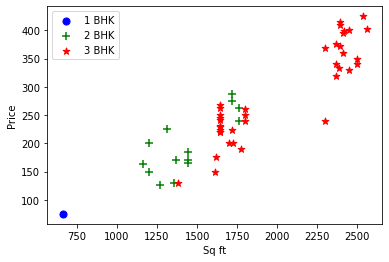

In [34]:
plot_scatter_char(df7,'Rajaji Nagar')

In [35]:
def remove_bhk_outliers(df):
    df_out = df.copy()
    exclude_indices = np.array([])
    for location,location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean' : np.mean(bhk_df['price per sqft']),
                'sd' : np.std(bhk_df['price per sqft']),
                'count' : bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices,bhk_df[bhk_df['price per sqft']<(stats['mean'])].index.values)
    return df_out.drop(exclude_indices,axis='index')
        
        

In [36]:
df8 = remove_bhk_outliers(df7)
df8.shape

(7342, 7)

(1, 7)
(14, 7)
(25, 7)


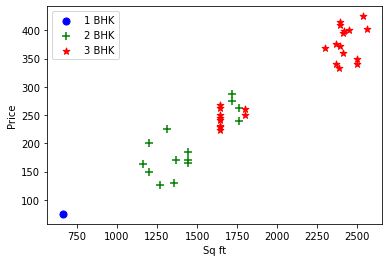

In [37]:
plot_scatter_char(df8,'Rajaji Nagar')

In [38]:
# Remove bath outlier feature
df8[df8['bhk']+2<df8['bath']]

,location,total_sqft,bath,balcony,price,bhk,price per sqft
1637,Chikkabanavar,2460.0,7.0,2.0,80.0,4,3252.032520
5232,Nagasandra,7000.0,8.0,2.0,450.0,4,6428.571429
6702,Thanisandra,1806.0,6.0,2.0,116.0,3,6423.034330
8405,other,11338.0,9.0,1.0,1000.0,6,8819.897689


In [39]:
df9 = df8[df8['bhk']+2>df8['bath']]
df9.shape

(7264, 7)

### Now the data is proper and lets create a model

In [40]:
df9.head(30)

,location,total_sqft,bath,balcony,price,bhk,price per sqft
1,Devarachikkanahalli,1250.0,2.0,2.0,40.0,2,3200.000000
2,Devarachikkanahalli,1200.0,2.0,2.0,83.0,2,6916.666667
3,Devarachikkanahalli,1170.0,2.0,2.0,40.0,2,3418.803419
4,Devarachikkanahalli,1425.0,2.0,2.0,65.0,3,4561.403509
5,Devarachikkanahalli,947.0,2.0,2.0,43.0,2,4540.654699
6,Devarachikkanahalli,1130.0,2.0,2.0,36.0,2,3185.840708
7,Devarachikkanahalli,1417.0,2.0,2.0,76.0,3,5363.443896
8,Devarachikkanahalli,1230.0,2.0,1.0,58.0,2,4715.447154
9,Devarachikkanahalli,1705.0,3.0,2.0,75.0,3,4398.826979
10,Devarachikkanahalli,1116.0,2.0,1.0,47.0,2,4211.469534


In [41]:
dummies = pd.get_dummies(df9['location'])
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
df10 = pd.concat([df9,dummies],axis="columns")
df10.head()

,location,total_sqft,bath,balcony,price,bhk,price per sqft,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
1,Devarachikkanahalli,1250.0,2.0,2.0,40.0,2,3200.000000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Devarachikkanahalli,1200.0,2.0,2.0,83.0,2,6916.666667,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Devarachikkanahalli,1170.0,2.0,2.0,40.0,2,3418.803419,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Devarachikkanahalli,1425.0,2.0,2.0,65.0,3,4561.403509,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Devarachikkanahalli,947.0,2.0,2.0,43.0,2,4540.654699,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
from sklearn.model_selection import train_test_split,ShuffleSplit, cross_val_score
X = df10.drop(['location','price per sqft','price'],axis="columns")
y = df10['price']
X

,total_sqft,bath,balcony,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
1,1250.0,2.0,2.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1200.0,2.0,2.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1170.0,2.0,2.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1425.0,2.0,2.0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,947.0,2.0,2.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10235,1200.0,2.0,3.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10236,1800.0,1.0,1.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10239,1353.0,2.0,2.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10240,812.0,1.0,0.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [64]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [65]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [67]:
model_lr = LinearRegression()
model_lr.fit(X_train,y_train)
model_lr.score(X_test,y_test)

0.8671261788669837

In [62]:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.82620848, 0.81411975, 0.87738568, 0.84837295, 0.8609646 ])

In [47]:
ss = ShuffleSplit(n_splits=5,test_size=0.2)
cross_val_score(LinearRegression(),X,y,cv)

array([-2.77335158e+15,  6.98218058e-01,  6.83555533e-01,  6.54046437e-01,
       -4.95863137e+15])

In [48]:
from sklearn.linear_model import Lasso
model_lasso = Lasso()
model_lasso.fit(X_train,y_train)
model_lasso.score(X_test,y_test)

0.6907576306937153

In [49]:
from sklearn.linear_model import Ridge
model_ridge = Ridge()
model_ridge.fit(X_train,y_train)
model_ridge.score(X_test,y_test)

0.7935894544931352

In [56]:
from sklearn.model_selection import GridSearchCV
def find_best_model_using_gridsearchCV():
    model_And_mp = {
        'lr': {
            'model': LinearRegression(),
            'params': {
                'normalize' : [True,False]
            }
        },
        'lasso':{
            'model' : Lasso(),
            'params' : {
                'alpha' : [1,2],
                'selection' : ['random','cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ["mse","friedman_mse"],
                'splitter' : ["best","random"]
            }
        }
    }
    cv = ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
    scores=[]
    for model_name,mp in model_And_mp.items():
        gs = GridSearchCV(mp['model'],mp['params'],cv=cv,return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model' : model_name,
            'best_score' : gs.best_score_,
            'best_params' : gs.best_params_
        })
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

In [58]:
df_res = find_best_model_using_gridsearchCV()
df_res

,model,best_score,best_params
0,lr,0.845410,{'normalize': False}
1,lasso,0.719253,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.756598,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


In [69]:
X.columns

Index(['total_sqft', 'bath', 'balcony', 'bhk', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       ...
       'Vishveshwarya Layout', 'Vishwapriya Layout', 'Vittasandra',
       'Whitefield', 'Yelachenahalli', 'Yelahanka', 'Yelahanka New Town',
       'Yelenahalli', 'Yeshwanthpur', 'other'],
      dtype='object', length=246)

In [71]:
def predict_price(location,sqft,bath,balcony,bhk):
    loc_index = np.where(X.columns==location)[0][0]
    x=np.zeros(len(X.columns))
    x[0],x[1],x[2],x[3]=sqft,bath,balcony,bhk
    if(loc_index>=0):
        x[loc_index] = 1
    return model_lr.predict([x])[0]
    

In [76]:
predict_price("1st Phase JP Nagar",1000.0,2.0,1.0,2)

83.58599853515625

In [80]:
predict_price("1st Phase JP Nagar",1000.0,2.0,1.0,3)

83.42352294921875

In [78]:
predict_price("Indira Nagar",1000,2,1,2)

175.19789123535156

In [79]:
predict_price("Indira Nagar",1000,3,1,3)

177.7851333618164

In [96]:
import pickle
with open('bglr_house_price_prediction','wb') as f:
    pickle.dump(model_lr,f)

In [97]:
# Also we need columns information
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}

with open('columns.json','w') as f:
    f.write(json.dumps(columns))

In [98]:
# The pickle file & json file are useful in flask server

In [100]:
with open('bglr_house_price_prediction','rb') as f:
    test_model = pickle.load(f)

In [101]:
test_model.score(X_test,y_test)

0.8671261788669837